# Load Packages

In [85]:
#load main packages
import pandas as pd
print("pandas version: {}". format(pd.__version__))

import numpy as np
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 


pandas version: 0.24.2
NumPy version: 1.16.2
SciPy version: 1.2.1


In [86]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


In [87]:
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import preprocessing
# from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


scikit-learn version: 0.20.3


### Load Datasets and Preview

In [88]:
# Load in the train and test datasets

train = pd.read_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/train.csv')
test = pd.read_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/test.csv')
data = pd.concat([train, test], ignore_index=True, sort = False)

In [89]:
# data.columns.values

### Data Cleaning (=Data Pre-processing)

In [90]:
# data.nunique()

In [91]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [92]:
m = data['Age'].median()
data['Age'].fillna(m,inplace=True)
data['Age']=data['Age'].astype(int)
w=data['Fare'].median()
data['Fare'].fillna(w,inplace=True)

In [93]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [94]:
#data['Sex'].replace('male','1',inplace=True)
#data['Sex'].replace('female','0',inplace=True)
#data['Sex']=data['Sex'].astype(int)
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

In [95]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype=object)

In [96]:
data.drop(['Pclass','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Sex            1309 non-null int32
Age            1309 non-null int32
Fare           1309 non-null float64
FamilySize     1309 non-null int64
dtypes: float64(2), int32(2), int64(2)
memory usage: 51.2 KB


##### Входящие переменные (данные):
- Sex: бинарный тип, целочисленные значения {0 <female>, 1 <male>}
- Age: количественный тип, целочисленные значения от 0 до 80
- Fare: количественный тип, вещественные значения от 0 до 512.3292
- FamilySize: количественный тип, целочисленные значения от 1 до 11

#### Normalization

In [98]:
train_data = data
train_data = train_data.dropna()
y = train_data['Survived']
X = train_data.drop(['Survived','PassengerId'],axis=1)

X_to_be_predicted = data[data.Survived.isnull()]
z = X_to_be_predicted['PassengerId']
X_to_be_predicted = X_to_be_predicted.drop(['Survived','PassengerId'], axis = 1)

In [99]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_to_be_predicted = preprocessing.StandardScaler().fit(X_to_be_predicted).transform(X_to_be_predicted.astype(float))

D:\Soft\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Soft\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [100]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=4)

### SVM

In [101]:
##SVM poly
clf = svm.SVC(kernel='poly',gamma='auto',max_iter=10000,degree=2, cache_size=500)
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print(acc)

0.8156424581005587


In [102]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':z,'Survived':result})
submission.Survived = submission.Survived.astype(int)
submission.to_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/CVM_poly.csv',index=False)

In [103]:
##SVM linear
clf = svm.SVC(kernel='linear',gamma='auto')
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print(acc)

0.8100558659217877


In [104]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':z,'Survived':result})
submission.Survived = submission.Survived.astype(int)
submission.to_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/CVM_linear.csv',index=False)

In [105]:
##SVM rbf
clf = svm.SVC(kernel='rbf',gamma='auto')
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print(acc)

0.8435754189944135


In [106]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':z,'Survived':result})
submission.Survived = submission.Survived.astype(int)
submission.to_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/CVM_rbf.csv',index=False)

### Random Forest

In [107]:
##Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500,
min_samples_split=10,
min_samples_leaf=4,
max_features='auto',
oob_score=True,
random_state=1,
n_jobs=-1)
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print(acc)

0.8435754189944135


In [108]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':z,'Survived':result})
submission.Survived = submission.Survived.astype(int)
submission.to_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/RF.csv',index=False)

### Naive Bayes

In [109]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
nbclf = clf.fit(x_train, y_train)
acc=clf.score(x_test, y_test)
print(acc)

0.8212290502793296


In [110]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':z,'Survived':result})
submission.Survived = submission.Survived.astype(int)
submission.to_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/Naive_Bayes.csv',index=False)

### KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
        
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
   
mean_acc

array([0.80446927, 0.77653631, 0.80446927, 0.79888268, 0.81005587,
       0.81564246, 0.79888268, 0.7877095 , 0.79888268])

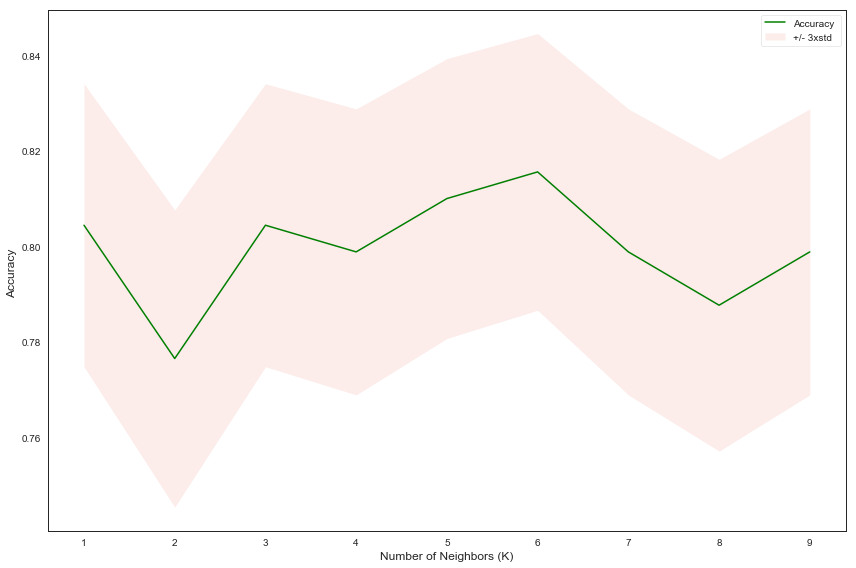

In [112]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [113]:
k = 6
neigh_opt = KNeighborsClassifier(n_neighbors = 6).fit(x_train,y_train)
result = neigh_opt.predict(X_to_be_predicted)

In [114]:
submission = pd.DataFrame({'PassengerId':z,'Survived':result})
submission.Survived = submission.Survived.astype(int)
submission.to_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/KNN_final.csv',index=False)

### XGBoosting

In [115]:
# conda install -c anaconda py-xgboost
# conda update -n base -c defaults conda

In [137]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=500, 
                    learning_rate=0.1,
                    max_depth=8,
                    subsample=0.9
                   )
clf.fit(x_train, y_train, 
        early_stopping_rounds=5, 
        eval_set=[(x_test, y_test)], 
        verbose=False)
acc=clf.score(x_test, y_test)
print(acc)

0.8603351955307262


In [133]:
from sklearn.metrics import mean_absolute_error

predictions = clf.predict(x_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.1452513966480447


In [118]:
submission = pd.DataFrame({'PassengerId':z,'Survived':result})
submission.Survived = submission.Survived.astype(int)
submission.to_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/XG_boosting_final.csv',index=False)